<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análise de Risco de Crédito direcionada por Modelagem Matemática e Estatística
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra código fonte da Tese de Bacharelado do curso de Engenharia de Controle e Automação da UNESP Sorocaba desenvolvido pelo aluno Leonardo Aderaldo Vargas.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Amostra baseada na base de dados do Lending Club Loan Data : https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Lending Club é uma empresa de empréstimos peer-to-peer com sede nos EUA. Eles combinam pessoas que desejam investir dinheiro com pessoas que desejam pedir dinheiro emprestado. Quando os investidores investem o seu dinheiro através do Lending Club, esse dinheiro é repassado aos mutuários e, quando os mutuários pagam os seus empréstimos, o capital mais os juros são repassados ​​aos investidores. É uma vitória para todos, pois podem obter taxas de empréstimo normalmente mais baixas e retornos mais elevados para os investidores.</i>
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>O conjunto de dados Lending Club contém dados completos de empréstimos para todos os empréstimos emitidos entre 2007-2015, incluindo a situação atual do empréstimo (atual, atrasado, totalmente pago, etc.) e as informações de pagamento mais recentes. Os recursos (também conhecidos como variáveis) incluem pontuação de crédito, número de consultas financeiras, endereço incluindo códigos postais e estado, e cobranças, entre outros. As cobranças indicam se o cliente perdeu um ou mais pagamentos e a equipe está tentando recuperar o dinheiro. O arquivo é uma amostra da base de dados exposta.</i>
</p>  





# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [42]:
# Importação das Bibliotecas e Parâmetros de Otimização
from functions import *
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# Spark Session
from pyspark.sql import SparkSession, Row 
#from pyspark.sql.functions import * as F
import pyspark.sql.functions as F
spark = SparkSession.builder.getOrCreate()

# <font color='red' style='font-size: 40px;'> 1. Entendimento da Base de Dados </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 1.1) Descrição da Base de Dados </font>
<hr style='border: 2px solid green;'>

### Variável Target

 > 1. loan_status: Situação atual do empréstimo, sendo possível classificar o Cliente em Bom ou Ruim

### Variáveis Referentes ao Produto

 > 1. term: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (IMPORTANTE)

 > 2. grade: Grau de empréstimo atribuído (IMPORTANTE)

 > 3. sub_grade: Subclasse de empréstimo atribuído (IMPORTANTE)

 > 4. desc: Descrição do motivo do cliente para pegar o empréstimo

 > 5. purpose: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (IMPORTANTE)

 > 6. title: Título do empréstimo fornecida pelo cliente

 > 7. application_type: Indica se o empréstimo é um pedido individual ou um pedido conjunto de dois clientes (IMPORTANTE)

 > 8. loan_amnt: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (IMPORTANTE)

 > 9. funded_amnt: Valor total comprometido com esse empréstimo naquele momento (IMPORTANTE)

 > 10. int_rate: Taxa de juros do empréstimo (IMPORTANTE)

 > 11. issue_d: Data em que o empréstimo foi financiado (IMPORTANTE)

 > 12. policy_code: Flag que indica Produto disponível publicamente ou não (IMPORTANTE)

 > 13. last_credit_pull_d: Mês mais recente que a LC retirou crédito para este empréstimo (IMPORTANTE)

 > 14. mths_since_last_delinq: Número de meses desde a última inadimplência do usuário (IMPORTANTE)


 ### Variáveis Referentes ao Cliente

 > 1. emp_title: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. emp_length: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. home_ownership: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. verification_status: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. annual_inc: Renda anual declarada pelo cliente (IMPORTANTE)

 > 6. tot_cur_bal: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 7. total_rev_hi_lim: Limite de rotativos total (IMPORTANTE)
 
 > 6. revol_bal: Limite de rotativos utilizado (IMPORTANTE)

 > 7. revol_util: Taxa de utilização de Limite de rotativos (IMPORTANTE)

 > 8. total_bal_il: Saldo atual total de todas as contas parceladas (IMPORTANTE)

 > 9. il_util: Proporção entre o saldo atual total e o limite de crédito/crédito alto em todas as contas de instalação (IMPORTANTE)

 > 10. open_rv_12m: Número de negociações rotativas abertas nos últimos 12 meses (IMPORTANTE)

 > 11. open_rv_24m: Número de negociações rotativas abertas nos últimos 24 meses (IMPORTANTE)

 > 12. open_acc: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. open_acc_6m: Número de produtos de crédito atualmente contratados no histórico do cliente  (IMPORTANTE)

 > 14. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 15. max_bal_bc: Saldo atual máximo devido em todas as contas (IMPORTANTE)

 > 16. all_util: Saldo até o limite de crédito em todas as negociações (IMPORTANTE)

 > 17. acc_now_delinq: Número de contas nas quais o mutuário está atualmente inadimplente (IMPORTANTE)

 > 18. open_il_6m: Número de contas parceladas abertas nos últimos 6 meses (IMPORTANTE)

 > 19. open_il_12m: Número de contas parceladas abertas nos últimos 12 meses (IMPORTANTE)

 > 20. open_il_24m: Número de contas parceladas abertas nos últimos 24 meses (IMPORTANTE)

 > 21. out_prncp: Capital restante em aberto para parte do valor total financiado pelos investidores

 > 22. out_prncp_inv: Capital restante em aberto para parte do valor total financiado pelos investidores

 > 23. inq_last_12m: Número de consultas de crédito nos últimos 12 meses (IMPORTANTE)

 > 24. zip_code: 3 primeiros números do CEP do cliente (IMPORTANTE)

 > 25. addr_state: Estado do Cliente (IMPORTANTE)

 > 26. earliest_cr_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 27. mths_since_last_record: Número de meses desde o último registro público (IMPORTANTE)

 > 28. mths_since_last_major_derog: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 29. mths_since_rcnt_il: Meses desde a abertura das contas parceladas mais recentes (IMPORTANTE)

 ### Variáveis de Pagamento

 > 1. pymnt_plan: Flag que indica se um plano de pagamento foi implementado para o empréstimo (IMPORTANTE)

 > 2. last_pymnt_d: Data do último pagamento (IMPORTANTE)

 > 3. next_pymnt_d: Data do próximo pagamento (IMPORTANTE)

 > 4. total_pymnt: Pagamentos recebidos até o momento pelo valor total financiado (IMPORTANTE)

 > 5. total_pymnt_inv: Pagamentos recebidos até o momento referentes a parte do valor total financiado pelos investidores 

 > 6. last_pymnt_amnt: Último valor do pagamento

 > 7. total_rec_prncp: Capital (valor originalmente emprestado) pago até o momento (IMPORTANTE)

 > 8. total_rec_int: Juros pago até o momento (IMPORTANTE)

 > 9. total_rec_late_fee: Taxas atrasadas até o momento (IMPORTANTE)

 > 10. recoveries: Pós cobrança da recuperação bruta (IMPORTANTE)

 > 11. collection_recovery_fee: Pós cobrança da taxa de cobrança (IMPORTANTE)

 > 12. tot_coll_amt: Valores totais de cobrança já devidos (IMPORTANTE)

 > 13. installment: Parcela mensal que o mutuário paga se o empréstimo for originado. Em termos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo. (IMPORTANTE)

 > 14. dti: Uma razão calculada utilizando o total dos pagamentos mensais da dívida do mutuário sobre o total das obrigações da dívida, excluindo a hipoteca e o empréstimo em ML solicitado, dividido pelo rendimento mensal autodeclarado pelo mutuário. (IMPORTANTE)


In [43]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url'], axis = 1)

# <font color='green' style='font-size: 30px;'> 1.2) Definição da Target </font>
<hr style='border: 2px solid green;'>

> 1. A priori, deve-se definir de maneira clara as situações consideradas como Default. Definiu-se um cliente ruim como aquele o qual está em:

- Processo de cobraça ('Charged Off')
- Inadimplente ('Default')
- Atrasado (31 dias ou mais)
- Critérios Mínimos de Aprovação - CMA ('Does not meet the credit policy. Status:Charged Off')
- Possui 1 ou mais contas em inadimplência

> 2. A partir desta definição, deve-se criar a Target mostrando exatamente o que é um cliente Bom ou Ruim 

> 3. Escolheu-se o número "0" para representar o cliente Bom e o número "1" para representar o cliente Ruim, pois o evento de interesse é definir principalmente quem são os Maus Pagadores a fim de evitar ao máximo a inadimplêmcia

> 4. Nota-se que em torno de 88.74% dos clientes são adimplentes, ao passo que 11.26% tornou-se inadimplente

> 5. Esta situação caracteriza um problema de classes desbalanceadas, portanto, isso deve-se ser levado em consideração durante o processo de modelagem e aplicar técnicas para lidar com este tipo de caso

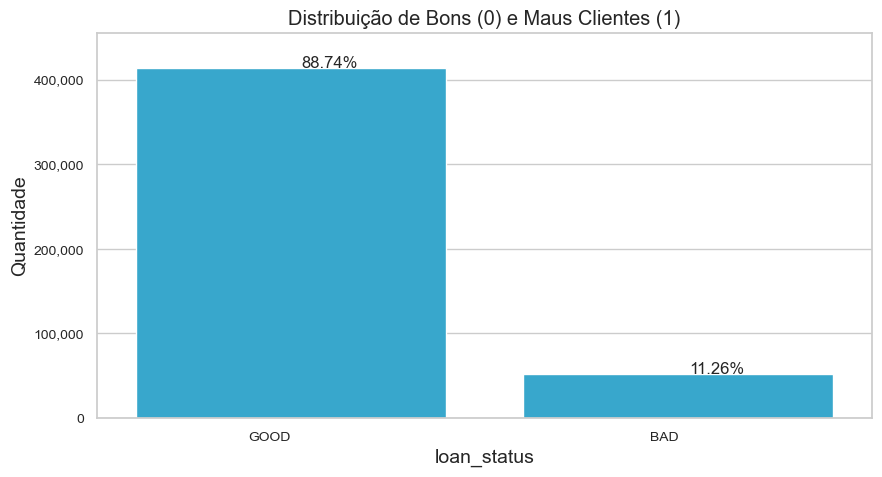

In [44]:
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
plota_barras(['loan_status'], False, df, 1, 1, 'Distribuição de Bons (0) e Maus Clientes (1)', 0)

# <font color='green' style='font-size: 30px;'> 1.3) Separação em Treino e Teste </font>
<hr style='border: 2px solid green;'>

> 1. Antes de realizar qualquer análise ou modelagem, deve-se separar em Treino e Teste a fim de simular um ambiente real

> 2. Ao separar antes de qualquer alteração, evita-se um erro muito grave denominado Data leakage

> 3. As análises serão realizadas unicamente sobre a base de Treinamento, simulando um ambiente real no qual a priori a base de Teste seria inexistente 

In [45]:
df_train = separa_treino_teste('loan_status', df, 0.20)[0]
df_test = separa_treino_teste('loan_status', df, 0.20)[1]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


# <font color='red' style='font-size: 40px;'> 2. Análise de Variáveis Referentes ao Cliente  </font>
<hr style='border: 2px solid red;'>

 ### Variáveis Referentes ao Cliente

 > 1. emp_title: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. emp_length: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. home_ownership: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. verification_status: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. annual_inc: Renda anual declarada pelo cliente (IMPORTANTE)

 > 6. tot_cur_bal: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 7. total_rev_hi_lim: Limite de rotativos total (IMPORTANTE)
 
 > 6. revol_bal: Limite de rotativos utilizado (IMPORTANTE)

 > 7. revol_util: Taxa de utilização de Limite de rotativos [revol_bal/total_rev_hi_lim] (IMPORTANTE)

 > 8. total_bal_il: Saldo atual total de todas as contas parceladas 

 > 9. il_util: Proporção entre o saldo atual total e o limite de crédito/crédito alto em todas as contas de instalação 

 > 10. open_rv_12m: Número de negociações rotativas abertas nos últimos 12 meses

 > 11. open_rv_24m: Número de negociações rotativas abertas nos últimos 24 meses

 > 12. open_acc: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. open_acc_6m: Número de produtos de crédito atualmente contratados no histórico do cliente  (IMPORTANTE)

 > 14. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 15. max_bal_bc: Saldo atual máximo devido em todas as contas 

 > 16. all_util: Saldo até o limite de crédito em todas as negociações

 > 17. acc_now_delinq: Número de contas nas quais o mutuário está atualmente inadimplente

 > 18. open_il_6m: Número de contas parceladas abertas nos últimos 6 meses

 > 19. open_il_12m: Número de contas parceladas abertas nos últimos 12 meses

 > 20. open_il_24m: Número de contas parceladas abertas nos últimos 24 meses

 > 21. out_prncp: Capital restante em aberto para parte do valor total financiado pelos investidores

 > 22. out_prncp_inv: Capital restante em aberto para parte do valor total financiado pelos investidores

 > 23. inq_last_12m: Número de consultas de crédito nos últimos 12 meses (IMPORTANTE)

 > 24. zip_code: 3 primeiros números do CEP do cliente (IMPORTANTE)

 > 25. addr_state: Estado do Cliente (IMPORTANTE)

 > 26. earliest_cr_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 27. mths_since_last_record: Número de meses desde o último registro público (IMPORTANTE)

 > 28. mths_since_last_major_derog: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 29. mths_since_rcnt_il: Meses desde a abertura das contas parceladas mais recentes (IMPORTANTE)

 > 30. mths_since_last_delinq: O número de meses desde a última inadimplência do mutuário (IMPORTANTE)

# <font color='green' style='font-size: 30px;'> 2.1) Número de Anos no emprego atual vs Target </font>
<hr style='border: 2px solid green;'>

> 1. Embora os extremos concentrem o número de inadimplências, o shape da distribuição não destaca uma tendência forte

> 2. Embora o teste do Chi-Quadrado tenha mostrado que há associação, o WOE mostra que não necessariamente há uma relação que afirma propensão a inadimplência de acordo com o passar dos anos, portanto, esta variável também parece não ter alto poder decisório

Pelo Teste Qui-Quadrado, há associação significativa entre emp_length e loan_status.


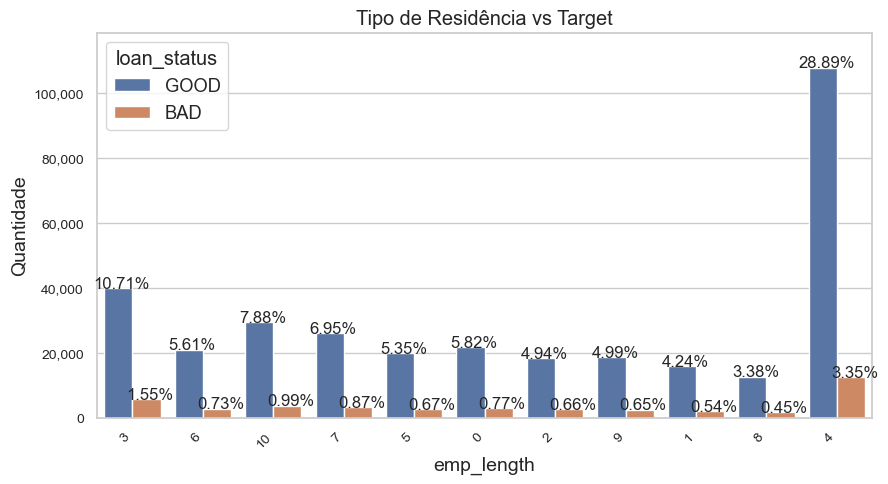

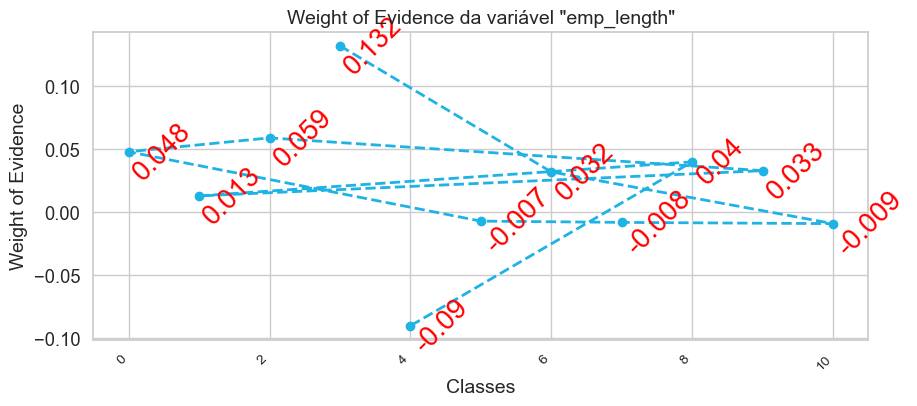

In [68]:
df_aux = df_train[['emp_length', 'loan_status']].copy()
df_aux['emp_length'] = (df_aux['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
df_aux['emp_length'] = df_aux['emp_length'].apply(lambda x:int(x))
teste_hipotese_duas_variaveis_categoricas(df_aux, 'emp_length', 'loan_status')
plota_barras(['emp_length'], 'loan_status', df_aux, 1, 1, 'Tipo de Residência vs Target', 45)
woe(df_aux, 'emp_length', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.2) Tipo de Residência vs Target </font>
<hr style='border: 2px solid green;'>

> 1. O tipo de residência aparenta ser uma variável com poder discriminativo

> 2. Baseando-se nas categorias Mortgage, Rent e Own, as quais são as únicas que possuem volumetria considerável, percebe-se pelo WOE que clientes de uma casa com Mortgage tendem a oferecer menor risco de inadimplência

Pelo Teste Qui-Quadrado, há associação significativa entre home_ownership e loan_status.


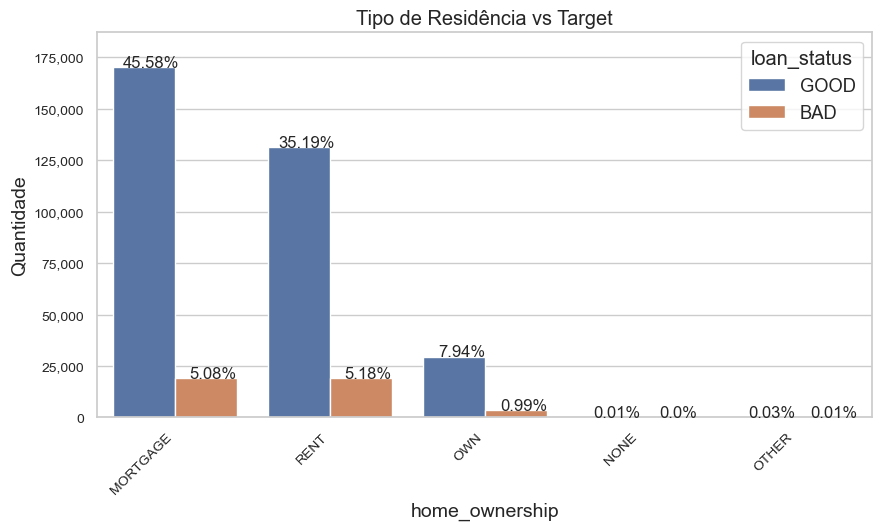

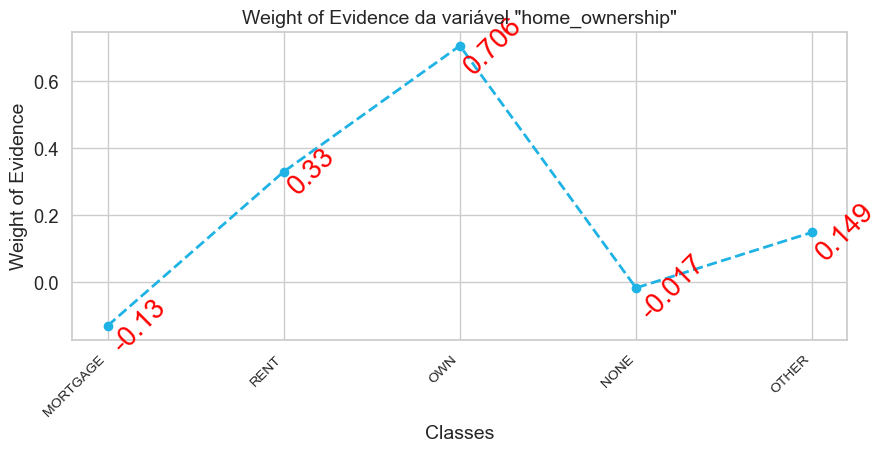

In [48]:
df_aux = df_train.loc[df_train['home_ownership'] != 'ANY'][['home_ownership', 'loan_status']].copy()
teste_hipotese_duas_variaveis_categoricas(df_aux, 'home_ownership', 'loan_status')
plota_barras(['home_ownership'], 'loan_status', df_aux, 1, 1, 'Tipo de Residência vs Target', 45)
woe(df_aux, 'home_ownership', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.3) Comprovação de Renda vs Target </font>
<hr style='border: 2px solid green;'>

> 1. A comprovação de renda é uma variável com forte poder de discriminação

> 2. Clientes de renda comprovada demonstram maior confiabilidade, portanto, o risco de inadimplência torna-se menor nestes casos.

Pelo Teste Qui-Quadrado, há associação significativa entre verification_status e loan_status.


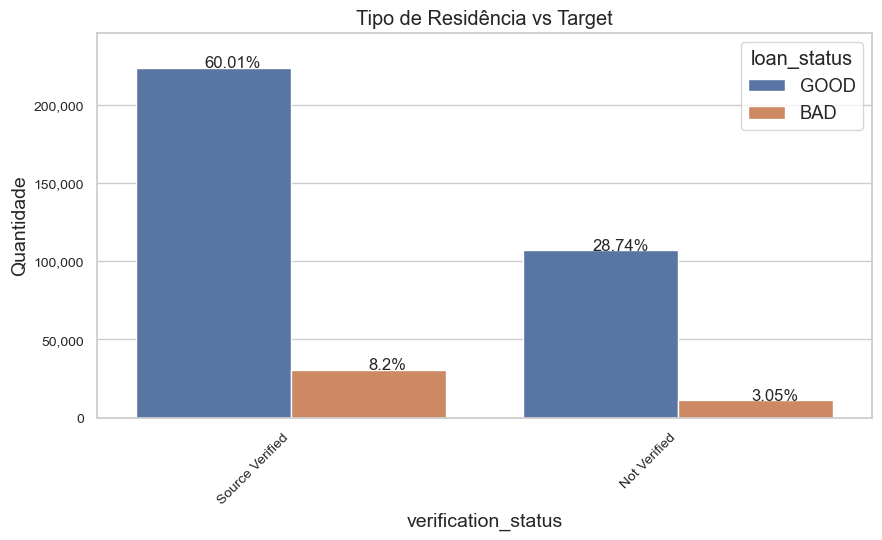

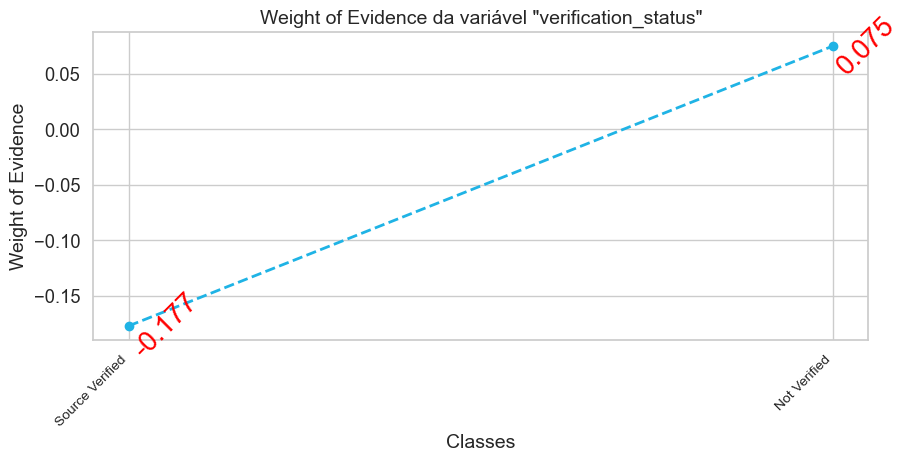

In [49]:
df_aux = df_train[['verification_status', 'loan_status']].copy()
df_aux['verification_status'] = np.where(df_aux['verification_status'].isin(['Not Verified']), 'Not Verified', 'Source Verified')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'verification_status', 'loan_status')
plota_barras(['verification_status'], 'loan_status', df_aux, 1, 1, 'Tipo de Residência vs Target', 45)
woe(df_aux, 'verification_status', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.4) Distribuição do ganho anual vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Como esperado, pessoas com maior faturamento tendem a ter menor inadimplência.

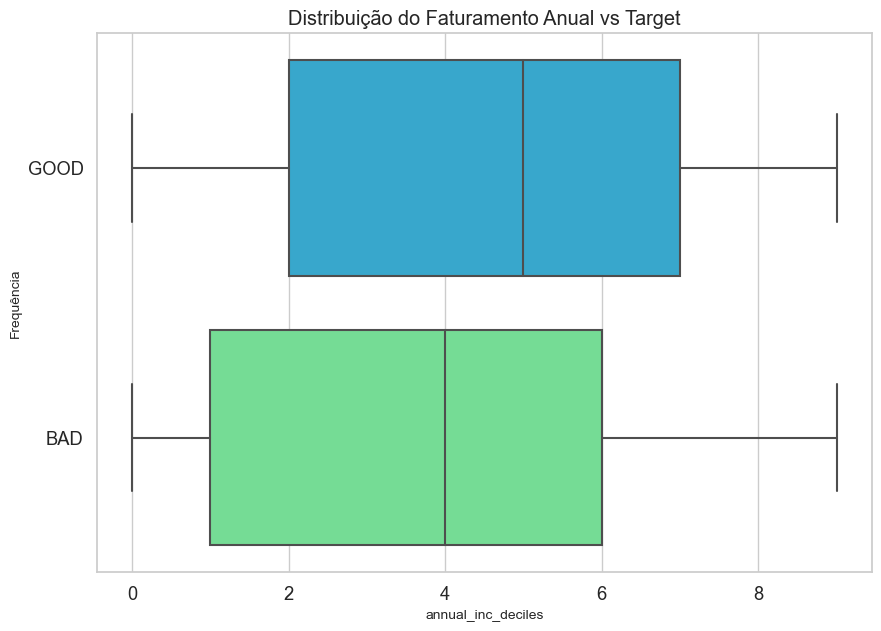

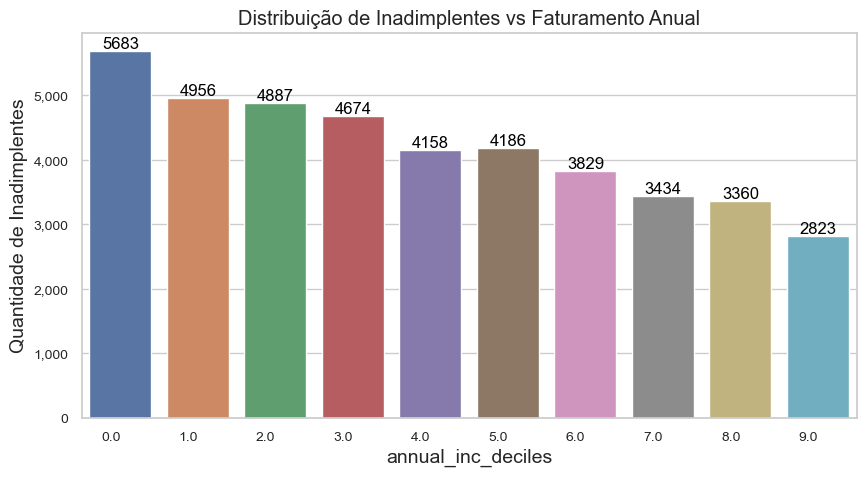

In [50]:
df_aux = df_train[['loan_status', 'annual_inc']].copy()
df_aux['annual_inc_deciles'] = transform_to_deciles(df_aux, 'annual_inc')
plota_boxplot(['annual_inc_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição do Faturamento Anual vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('annual_inc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('annual_inc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'annual_inc_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'annual_inc_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Faturamento Anual')

# <font color='green' style='font-size: 30px;'> 2.5) Distribuição do Limite Total vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Assim como o faturamento, pessoas com maior limite tendem a ter menor inadimplência.

> 2. Na visão de limite de rotativos (limite de cartão de crédito + cheque especial), nota-se esse comportamento nos decis mais altos, ou seja, quem possui grande limite de rotativos

> 3. Todavia, uma informação muito interessante é referente a taxa de utilização de limite de rotativos, a qual mostra que os clientes que utilizam grande parte do seu limite costumam dar mais inadimplências.

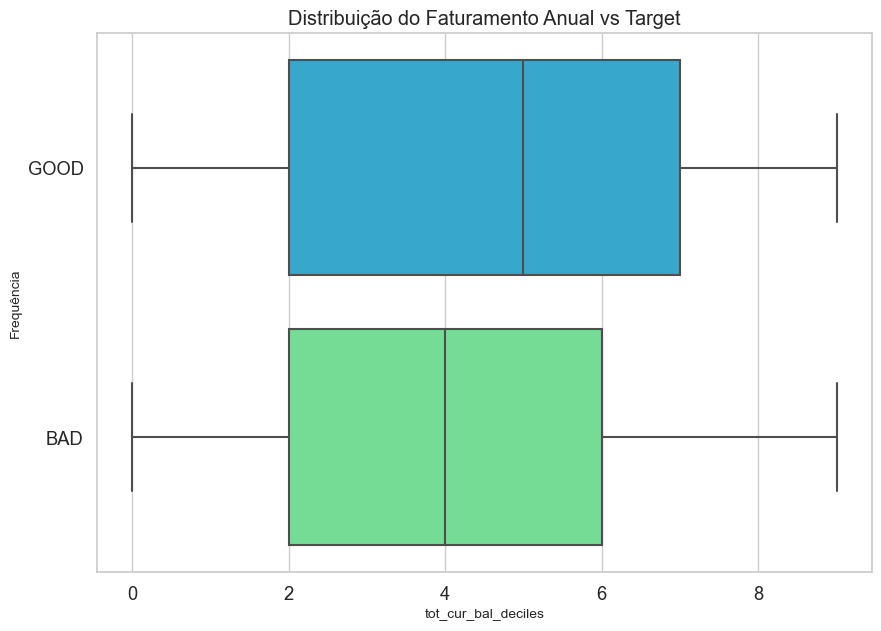

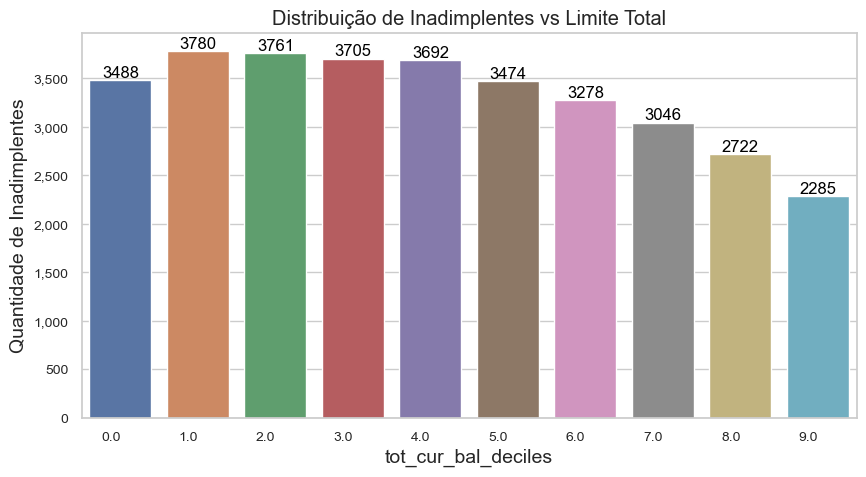

In [51]:
df_aux = df_train[['loan_status', 'tot_cur_bal']].copy()
df_aux['tot_cur_bal_deciles'] = transform_to_deciles(df_aux, 'tot_cur_bal')
plota_boxplot(['tot_cur_bal_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição do Faturamento Anual vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('tot_cur_bal_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('tot_cur_bal_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'tot_cur_bal_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'tot_cur_bal_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Limite Total')

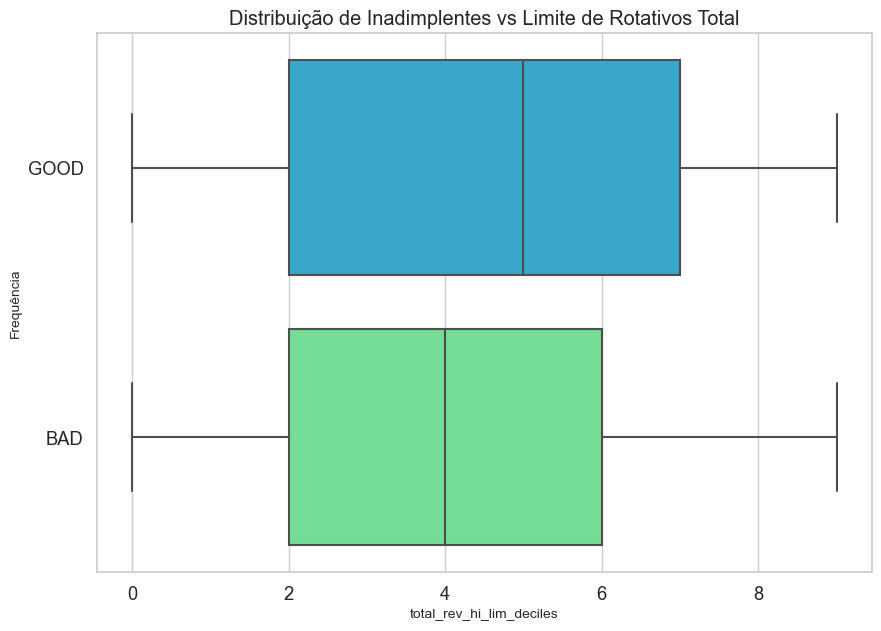

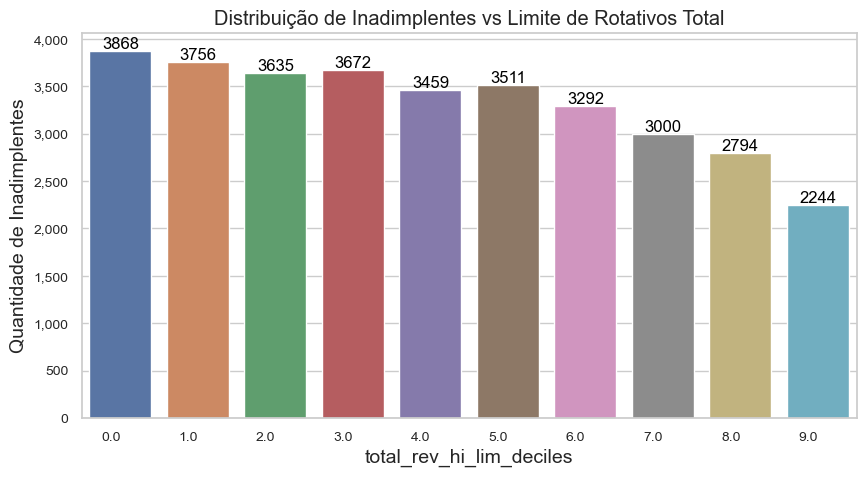

In [52]:
df_aux = df_train[['loan_status', 'total_rev_hi_lim']].copy()
df_aux['total_rev_hi_lim_deciles'] = transform_to_deciles(df_aux, 'total_rev_hi_lim')
plota_boxplot(['total_rev_hi_lim_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Limite de Rotativos Total')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('total_rev_hi_lim_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('total_rev_hi_lim_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'total_rev_hi_lim_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'total_rev_hi_lim_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Limite de Rotativos Total')

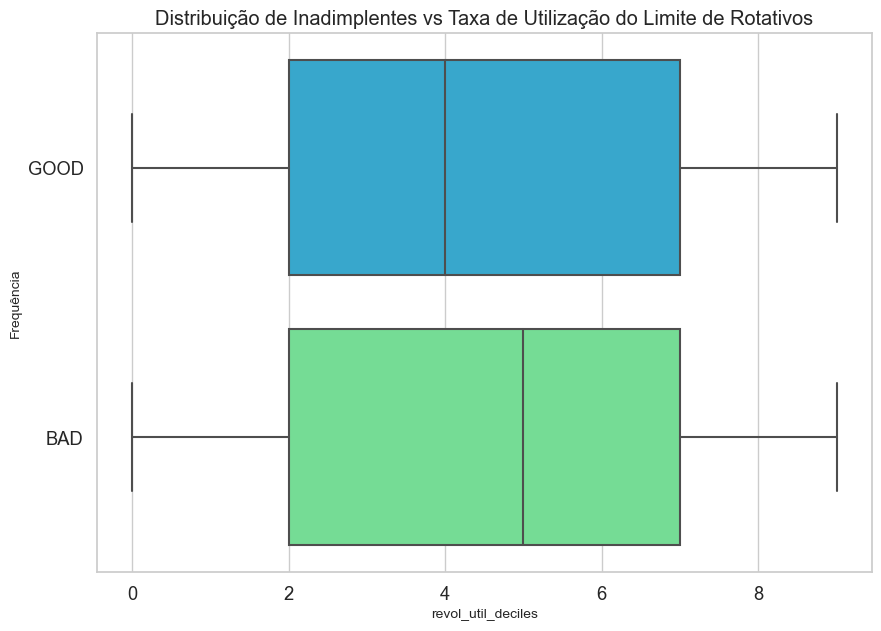

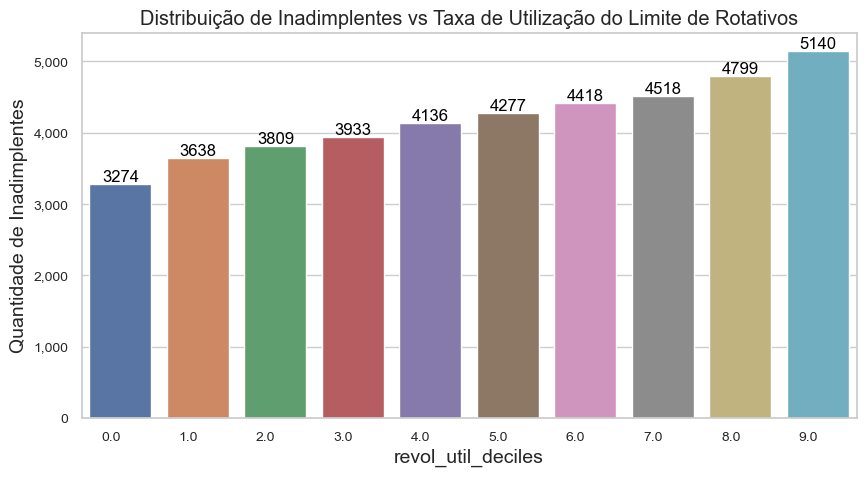

In [53]:
df_aux = df_train[['loan_status', 'revol_util']].copy()
df_aux['revol_util_deciles'] = transform_to_deciles(df_aux, 'revol_util')
plota_boxplot(['revol_util_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Taxa de Utilização do Limite de Rotativos')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('revol_util_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('revol_util_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'revol_util_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'revol_util_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Taxa de Utilização do Limite de Rotativos')

# <font color='green' style='font-size: 30px;'> 2.6) Distribuição do Número de Produtos Contratados vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Em relação ao número de produtos contratados atualmente, nota-se que não há ordenação nos decis, portanto, o fato do cliente ter diversos produtos de crédito contratados simultaneamente não necessariamente significa que ele ficará inadimplente. Na realidade, pode ser que pessoas com maior renda, limite e etc...contratam muitos produtos de uma só vez pois elas tem condições para pagá-los

> 2. Em relação ao número de produtos contratados historicamente, não se nota uma ordenação clara, todavia, clientes concetrados no decil 0 possuem maior inadimplência. O que justificaria isso provavelmente seria que eles são clientes novos e ainda não contrataram muitos produtos, logo, não se sabe muito sobre seu comportamento e, portanto, podemos ter errado ao conceder crédito a alguns.

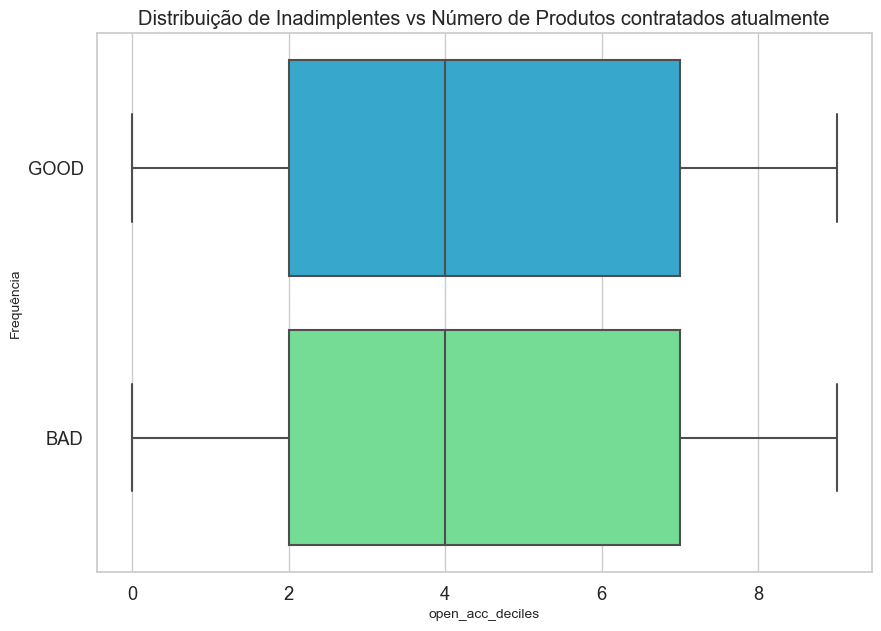

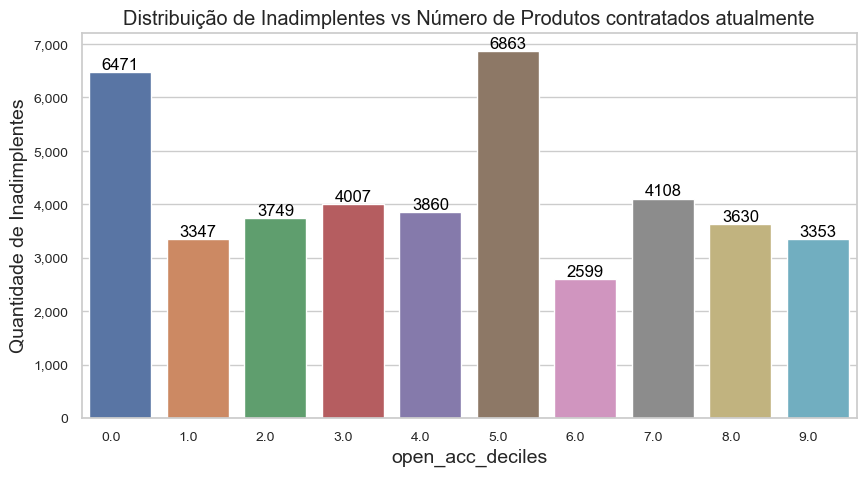

In [54]:
df_aux = df_train[['loan_status', 'open_acc']].copy()
df_aux['open_acc_deciles'] = transform_to_deciles(df_aux, 'open_acc')
plota_boxplot(['open_acc_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Número de Produtos contratados atualmente')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('open_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('open_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'open_acc_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'open_acc_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Número de Produtos contratados atualmente')

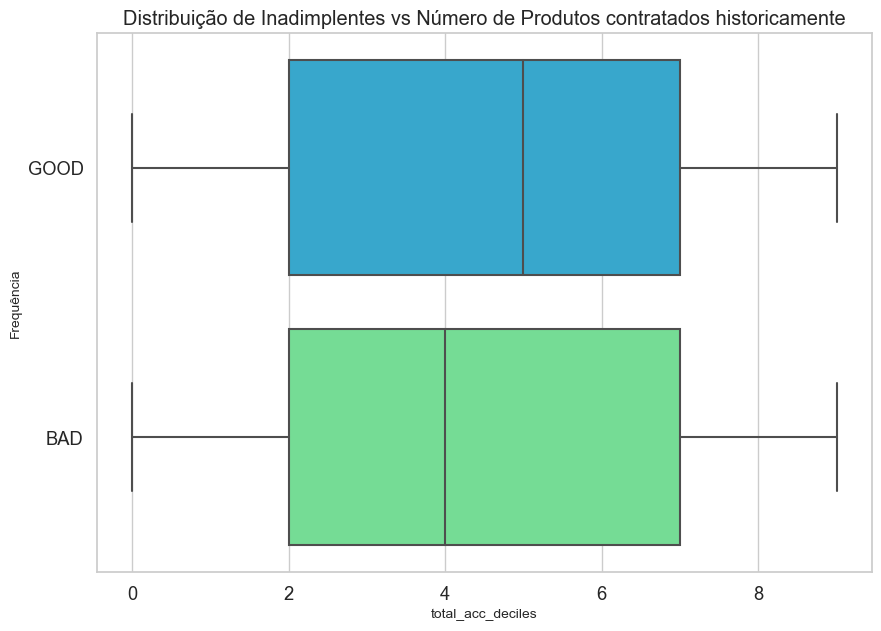

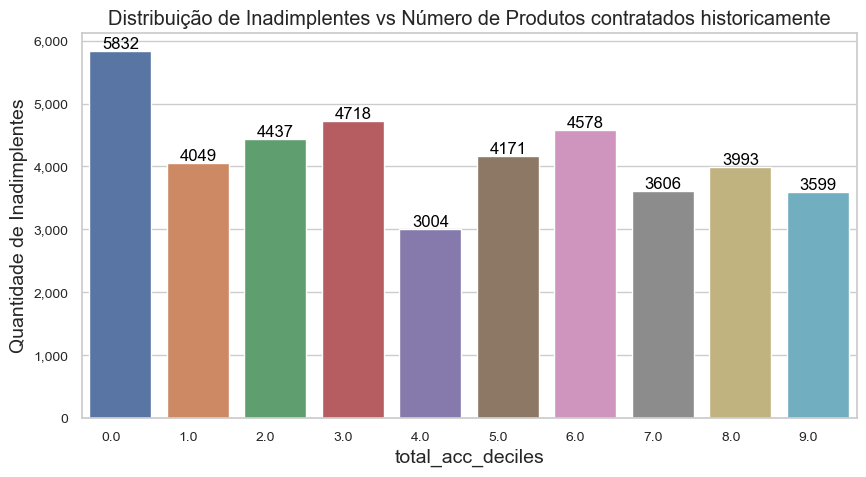

In [55]:
df_aux = df_train[['loan_status', 'total_acc']].copy()
df_aux['total_acc_deciles'] = transform_to_deciles(df_aux, 'total_acc')
plota_boxplot(['total_acc_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Número de Produtos contratados historicamente')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('total_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('total_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'total_acc_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'total_acc_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Número de Produtos contratados historicamente')

# <font color='green' style='font-size: 30px;'> 2.7) Número de meses desde a última inadimplência vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente o número de meses desde a última inadimplência não aparenta caráter discriminatório de forma geral, a não ser pelo decil 0.

> 2. No decil 0, há muito mais clientes com inadimplência. Isso se deve talvez pelo fato da própria montagem da Target captar esse efeito para inadimplência recentes e para inadimplências antigas provavelmente o cliente já se recuperou e pode-se realizar negócios novamente com ele

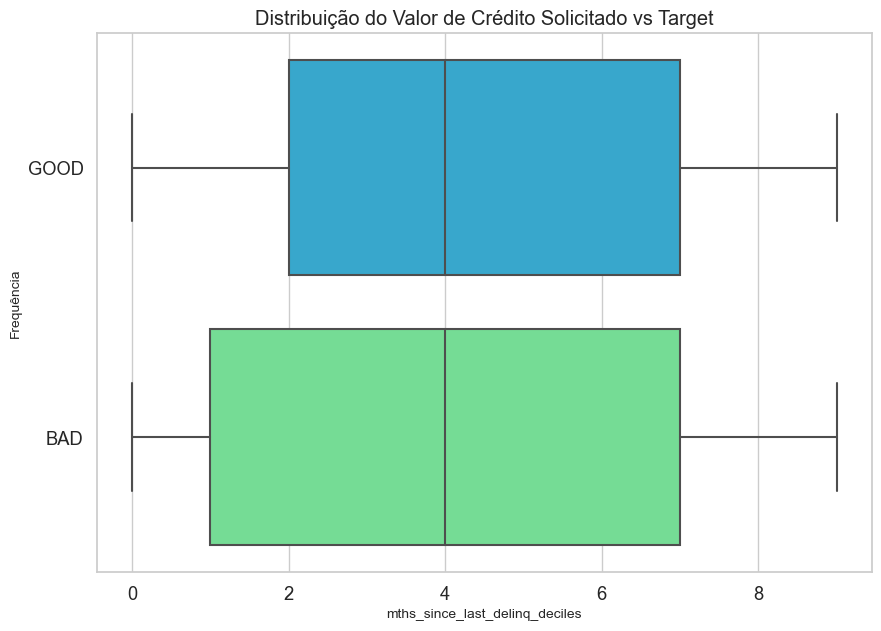

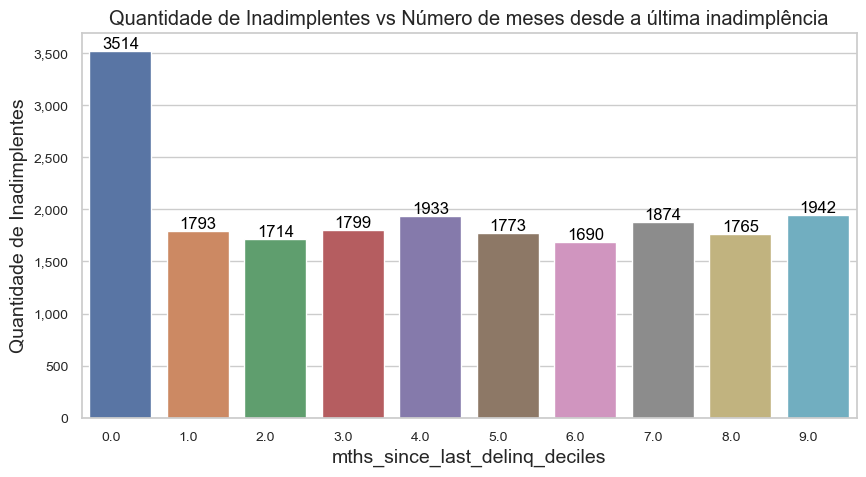

In [77]:
df_aux = df_train[['loan_status', 'mths_since_last_delinq']].copy()
df_aux = df_aux.loc[~df_aux['mths_since_last_delinq'].isnull()]
df_aux['mths_since_last_delinq_deciles'] = transform_to_deciles(df_train, 'mths_since_last_delinq')
plota_boxplot(['mths_since_last_delinq_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição do Valor de Crédito Solicitado vs Target')

good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('mths_since_last_delinq_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('mths_since_last_delinq_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'mths_since_last_delinq_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'mths_since_last_delinq_deciles', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a última inadimplência')

# <font color='green' style='font-size: 30px;'> 2.8) Número de meses desde a contratação do primeiro produto de crédito vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente clientes mais antigos tendem a proporcionar menor risco.

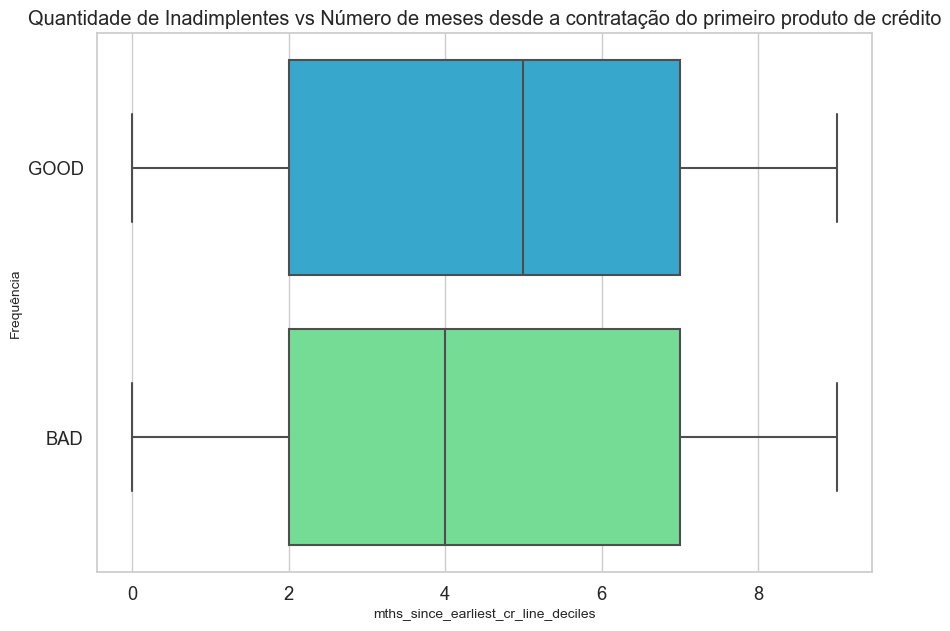

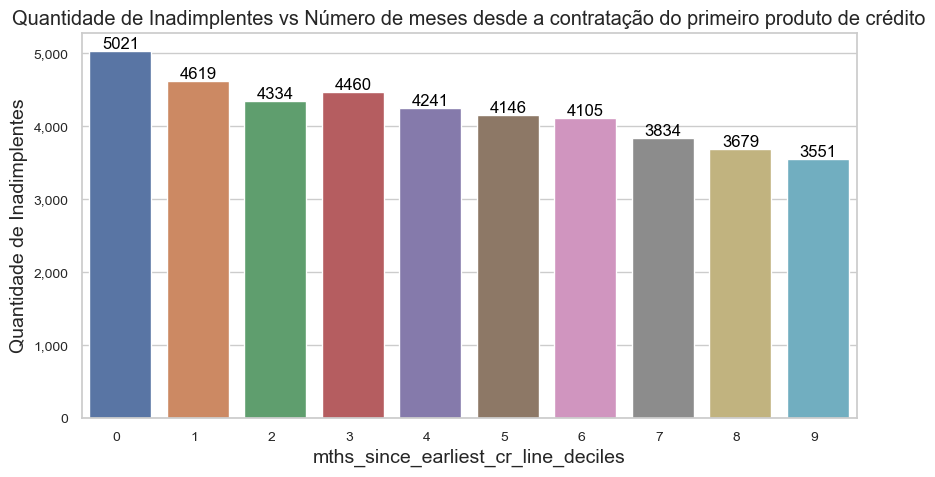

In [92]:
df_aux = df_train[['loan_status', 'earliest_cr_line']].copy()
df_aux['earliest_cr_line'] = pd.to_datetime(df_aux['earliest_cr_line'], format = '%b-%y')
df_aux['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df_aux['earliest_cr_line'])/np.timedelta64(1, 'M')))
df_aux['mths_since_earliest_cr_line'] = df_aux['mths_since_earliest_cr_line'].fillna(df_aux['mths_since_earliest_cr_line'].median())
df_aux['mths_since_earliest_cr_line'] = np.where(df_aux['mths_since_earliest_cr_line'] < 0, df_aux['mths_since_earliest_cr_line'].median(), df_aux['mths_since_earliest_cr_line'])
df_aux['mths_since_earliest_cr_line'] = df_aux['mths_since_earliest_cr_line'].apply(lambda x:int(x))
df_aux['mths_since_earliest_cr_line_deciles'] = transform_to_deciles(df_aux, 'mths_since_earliest_cr_line')
plota_boxplot(['mths_since_earliest_cr_line_deciles'], 'loan_status', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde a contratação do primeiro produto de crédito')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('mths_since_earliest_cr_line_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('mths_since_earliest_cr_line_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'mths_since_earliest_cr_line_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'mths_since_earliest_cr_line_deciles', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a contratação do primeiro produto de crédito')